# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from datetime import date

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Import OpenWeather API key
my_api_code_source = open('/Users/Richa/Desktop/weather_api_key.py') 
openweather_api_key = my_api_code_source.read()

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Import todays date in mm/dd/yyyy format
today = date.today()
today = today.strftime("%m/%d/%Y")

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#create url starter
url = "http://api.openweathermap.org/data/2.5/weather?q="

#define variables
city_list_data = []
city_name = []
units = "imperial"
lat = []
long = []
max_temp = []
humid = []
clouds = []
wind_speed = []
country = []
date = []
count = 0
record = 0
set_number = 1
error = 0


for city in cities:
    city_data = requests.get(f"{url}{city}&units={units}&appid={openweather_api_key}").json()
    try:
        city_list_data.append(city_data)
        
        # Perform ground work for df while processing records
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        long.append(city_data['coord']['lon'])
        max_temp.append(city_data['main']['temp_max'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        count += 1
        # Create if statement to keep track and add delay
        if record >= 50:
            record = 1
            set_number += 1
            time.sleep(1)
        else:
            record += 1
        
        #Print processing status
        print(f'Processing Record {record} of Set {set_number} | {city}')

    # If Key Error skip over it but add one to error count
    except KeyError:
        print('key error')
        error +=1

#Keep data clean and add end statement with counts found
print("-------------------")
print("Processing complete")
print(f"Successfully processed {count} cities")
print(f"Faied to process {error} cities")

Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | hami
Processing Record 4 of Set 1 | atuona
key error
Processing Record 5 of Set 1 | bardiyah
Processing Record 6 of Set 1 | ceres
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | haysville
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | klaksvik
key error
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | tiznit
Processing Record 15 of Set 1 | zhigansk
Processing Record 16 of Set 1 | rikitea
key error
Processing Record 17 of Set 1 | salalah
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | hobyo
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | wilmington
key error
Processing Record 23 of Set 1 | hualmay
Processing Record 24 of Se

Processing Record 48 of Set 4 | raduzhnyy
Processing Record 49 of Set 4 | waitati
Processing Record 50 of Set 4 | movileni
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | navalmoral de la mata
Processing Record 3 of Set 5 | pringsewu
Processing Record 4 of Set 5 | virginia beach
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | fort nelson
Processing Record 7 of Set 5 | thomasville
Processing Record 8 of Set 5 | libreville
Processing Record 9 of Set 5 | saint anthony
Processing Record 10 of Set 5 | chuy
Processing Record 11 of Set 5 | bira
key error
Processing Record 12 of Set 5 | agua verde
Processing Record 13 of Set 5 | bengkulu
Processing Record 14 of Set 5 | pleshanovo
key error
Processing Record 15 of Set 5 | martapura
Processing Record 16 of Set 5 | medicine hat
Processing Record 17 of Set 5 | ponta do sol
Processing Record 18 of Set 5 | alta floresta
Processing Record 19 of Set 5 | merke
Processing Record 20 of Set 5 | kargasok
Pr

Processing Record 45 of Set 8 | gamboma
Processing Record 46 of Set 8 | orsk
Processing Record 47 of Set 8 | coari
Processing Record 48 of Set 8 | bubaque
Processing Record 49 of Set 8 | mandalgovi
Processing Record 50 of Set 8 | alugan
Processing Record 1 of Set 9 | oistins
Processing Record 2 of Set 9 | mackenzie
Processing Record 3 of Set 9 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 9 | ixtapa
Processing Record 5 of Set 9 | bereda
Processing Record 6 of Set 9 | port-gentil
Processing Record 7 of Set 9 | harper
Processing Record 8 of Set 9 | sorland
Processing Record 9 of Set 9 | namibe
Processing Record 10 of Set 9 | itarema
Processing Record 11 of Set 9 | lower hutt
key error
Processing Record 12 of Set 9 | te anau
Processing Record 13 of Set 9 | ambon
Processing Record 14 of Set 9 | bungoma
Processing Record 15 of Set 9 | shingu
key error
Processing Record 16 of Set 9 | riobamba
Processing Record 17 of Set 9 | rimbey
Processing Record 18 of Set 9 | angoche
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Add lists into dictionary
city_weather_dict = {
    "City": city_name,
    "Latitude": lat,
    "Longitude": long,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date 
}

#Create df from dictionary
city_weather_df = pd.DataFrame(city_weather_dict)

#Export the city data into a .csv from variable defined above
city_weather_df.to_csv(output_data_file, index=False, header=True)

#Display df
city_weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,73.40,83,86,3.36,CK,1608565601
1,Yellowknife,62.46,-114.35,-18.00,75,90,8.05,CA,1608565502
2,Kumul,42.80,93.45,18.43,89,97,4.36,CN,1608565601
3,Atuona,-9.80,-139.03,78.01,75,0,14.14,PF,1608565601
4,Al Bardīyah,31.76,25.09,61.23,72,48,11.63,LY,1608565601


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,20.287475,20.425814,51.570475,74.140678,58.120339,8.036983,1.608566e+09
std,32.924219,91.288312,33.300188,19.710956,37.519898,5.693159,6.155454e+01
min,-54.800000,-179.170000,-45.150000,11.000000,0.000000,0.200000,1.608565e+09
25%,-5.592500,-62.682500,33.850000,64.250000,20.000000,3.660000,1.608566e+09
50%,23.450000,24.400000,62.265000,78.000000,75.000000,6.930000,1.608566e+09
75%,48.145000,102.277500,78.115000,88.000000,91.000000,10.937500,1.608566e+09
max,78.220000,179.320000,97.520000,100.000000,100.000000,37.070000,1.608566e+09


In [23]:
#  Get the indices of cities that have humidity over 100%.

#too_humid = city_weather_df[ city_weather_df['Humidity'] > 100].index
#print(too_humid)

Int64Index([], dtype='int64')


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_weather_df, which we call "clean_city_df".

#clean_city_df = city_weather_df.drop(too_humid)
#clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

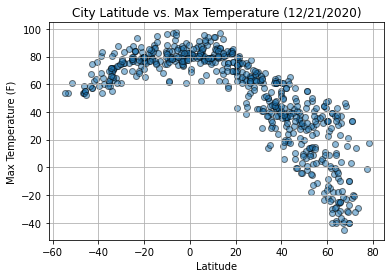

In [8]:
x_values = city_weather_df['Latitude']
y_values = city_weather_df['Max Temp']

plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

plt.savefig("output_data/LatitudeVsTemperaturePlot.png")

plt.show()


The City Latitude vs. Max Temperature plot is analyzing the maximum temperature at the moment recorded with regards to the latitude of the city it was taken.

## Latitude vs. Humidity Plot

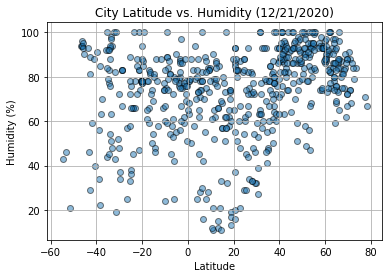

In [9]:
x_values = city_weather_df['Latitude']
y_values = city_weather_df['Humidity']

plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.savefig("output_data/LatitudeVsHumidityPlot.png")

plt.show()

The City Latitude vs. Humidity plot is analyzing the percent humidity recorded with regards to the latitude of the city it was taken.

## Latitude vs. Cloudiness Plot

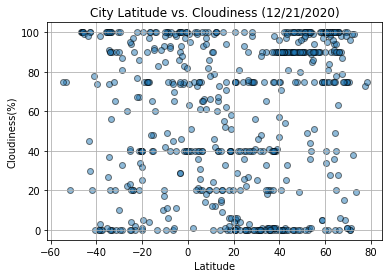

In [10]:
x_values = city_weather_df['Latitude']
y_values = city_weather_df['Cloudiness']

plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

plt.savefig("output_data/LatitudeVsCloudinessPlot.png")

plt.show()

The City Latitude vs. Cloudiness plot is analyzing the percent cloudiness recorded with regards to the latitude of the city it was taken

## Latitude vs. Wind Speed Plot

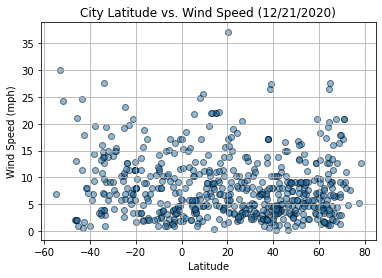

In [12]:
x_values = city_weather_df['Latitude']
y_values = city_weather_df['Wind Speed']

plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.savefig("output_data/LatitudeVsWindSpeedPlot.png")

plt.show()

The City Latitude vs. Wind Speed plot is analyzing the wind speed in miles per hour recorded with regards to the latitude of the city it was taken

## Linear Regression

In [13]:
#Find index for northern and southern hemispheres
index_northern = city_weather_df[ city_weather_df['Latitude'] >= 0].index
index_southern = city_weather_df[ city_weather_df['Latitude'] <= 0].index

#Create dfs for northern and southern hemispheres
northern_hemisphere_df = city_weather_df.drop(index_southern)
southern_hemisphere_df = city_weather_df.drop(index_northern)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression line equation is: y = -1.46x + 96.75
The r value is: 0.7389039671441324


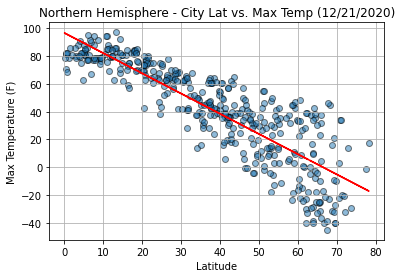

In [14]:
# define x and y axis values
x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Max Temp']

# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.plot(x_values,regress_values,"r-")

plt.title(f'Northern Hemisphere - City Lat vs. Max Temp ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

plt.savefig("output_data/Regression_Northern_LatitudeVsTemperaturePlot.png")

print(f'The regression line equation is: {line_eq}')
print(f'The r value is: {rvalue**2}')
plt.show()

With a r value of 0.7 this regression shows a strong correlation of higher temperature at latitudes closer to the equator (0) and cooler temperatures as you increase north.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression line equation is: y = 0.48x + 85.51
The r value is: 0.43933329086301565


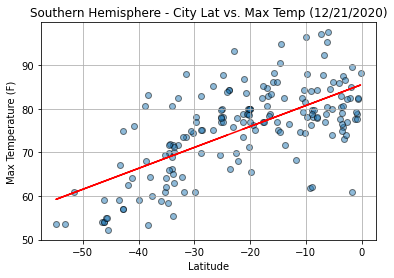

In [15]:
# define x and y axis values
x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Max Temp']

# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.plot(x_values,regress_values,"r-")

plt.title(f'Southern Hemisphere - City Lat vs. Max Temp ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

plt.savefig("output_data/Regression_Southern_LatitudeVsTemperaturePlot.png")

print(f'The regression line equation is: {line_eq}')
print(f'The r value is: {rvalue**2}')
plt.show()

With a rvalue of 0.34 this plot raveals a weak correlation of temperature decreasing as one moves further south from the equator. The  norther hemisphere plot has over double the points as the souther hemisphere plot and the southern data does not extend as far away from the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression line equation is: y = 0.42x + 59.27
The r value is: 0.18752965489598802


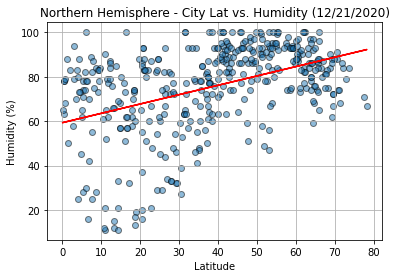

In [16]:
# define x and y axis values
x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Humidity']

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.plot(x_values,regress_values,"r-")

plt.title(f'Northern Hemisphere - City Lat vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.savefig("output_data/Regression_Northern_LatitudeVsHumidity.png")

print(f'The regression line equation is: {line_eq}')
print(f'The r value is: {rvalue**2}')
plt.show()

With a r value of 0.12 there is a weak negative correlation pointing to moving north from the equator giving way to more humidity 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression line equation is: y = 0.06x + 72.74
The r value is: 0.0019338483482614834


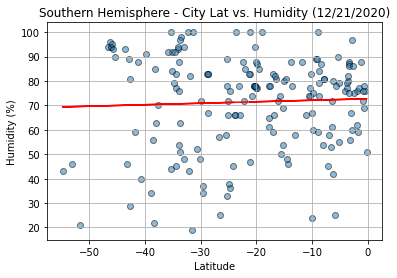

In [17]:
# define x and y axis values
x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Humidity']

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.plot(x_values,regress_values,"r-")

plt.title(f'Southern Hemisphere - City Lat vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

plt.savefig("output_data/Regression_Southern_LatitudeVsHumidity.png")

print(f'The regression line equation is: {line_eq}')
print(f'The r value is: {rvalue**2}')
plt.show()

With a r value of 0.06 while it is a weak correlation, there is almost 0 correlation between moving south from the equator and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression line equation is: y = 0.49x + 38.58
The r value is: 0.06950800324328572


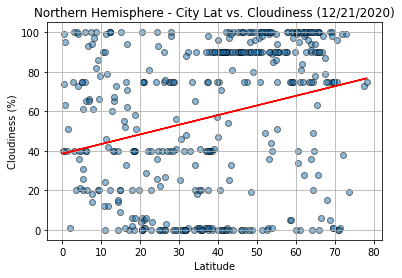

In [18]:
# define x and y axis values
x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Cloudiness']

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.plot(x_values,regress_values,"r-")

plt.title(f'Northern Hemisphere - City Lat vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

plt.savefig("output_data/Regression_Northern_LatitudeVsCloudiness.png")

print(f'The regression line equation is: {line_eq}')
print(f'The r value is: {rvalue**2}')
plt.show()

With a r value of 0.04, while there is a weak positive correlation, there is not enough to say with much certainity that cloudiness does increase with latitude. The graph shows from 0-100 percent cloudiness at most latitudes. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression line equation is: y = 0.23x + 65.27
The r value is: 0.007313197680902237


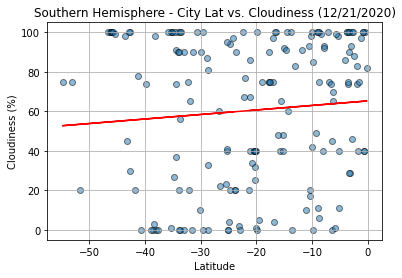

In [19]:
# define x and y axis values
x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Cloudiness']

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.plot(x_values,regress_values,"r-")

plt.title(f'Southern Hemisphere - City Lat vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

plt.savefig("output_data/Regression_Southern_LatitudeVsCloudiness.png")

print(f'The regression line equation is: {line_eq}')
print(f'The r value is: {rvalue**2}')
plt.show()

With a r value of 0.04, while there is a weak correlation, there is not enough to say with much certainity that cloudiness does increase with latitude. The graph shows from 0-100 percent cloudiness at most latitudes.

This is confirmed with the northern hemisphere. Though with both plots it seems a weak connection to moving north and more clouds.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression line equation is: y = -0.01x + 8.25
The r value is: 0.0017398757118412414


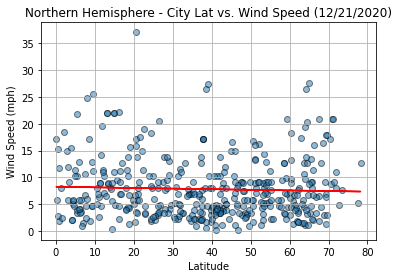

In [20]:
# define x and y axis values
x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Wind Speed']

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.plot(x_values,regress_values,"r-")

plt.title(f'Northern Hemisphere - City Lat vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.savefig("output_data/Regression_Northern_LatitudeVsWindSpeed.png")

print(f'The regression line equation is: {line_eq}')
print(f'The r value is: {rvalue**2}')
plt.show()

With a r alue of 0.03 there is a weak positive correlation between moving north and wind speed. This mean it is possible that the more north the go you may encounter a little more wind, but not a strong chance with relevance to latitude alone.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression line equation is: y = -0.11x + 6.28
The r value is: 0.0638007980650613


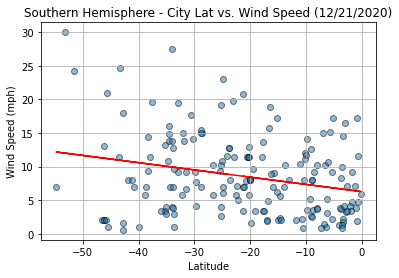

In [21]:
# define x and y axis values
x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Wind Speed']

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plots
plt.scatter(x_values, y_values, alpha=0.5, edgecolor='black') 
plt.plot(x_values,regress_values,"r-")

plt.title(f'Southern Hemisphere - City Lat vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.savefig("output_data/Regression_Southern_LatitudeVsWindSpeed.png")

print(f'The regression line equation is: {line_eq}')
print(f'The r value is: {rvalue**2}')
plt.show()

With a r alue of 0.03 there is a weak correlation between moving south (away from the equator) and wind speed. This mean it is possible that the more south the go you may encounter a little more wind, but there are other factors that one need to consider than latitude alone. For instance elevation.